* In this project I'm going through the tmdb dataset analysis
* Doing this i will try to answer the following questions:
  * 1- What are the most common genres?
  * 2- What are the most working production companies?
  * 3- Which actors contributed most in the movies?
  * 4- Who Directed the most ?
  * 5- How data columns are correlated to each other?
  * 6- What movie has the highest and the lowest budget, revenue, popularity, runtime and vote_average?
  <br><br>

* I will depend mostly on visual representation of my findings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Load CSV File Data

In [2]:
df = pd.read_csv('tmdb-movies.csv')

## Show Some basic info about data

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.shape

(10866, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

## Get all columns datatypes

In [6]:
for col in df.columns:
    print(col, type(df[col].iloc[0]))

id <class 'numpy.int64'>
imdb_id <class 'str'>
popularity <class 'numpy.float64'>
budget <class 'numpy.int64'>
revenue <class 'numpy.int64'>
original_title <class 'str'>
cast <class 'str'>
homepage <class 'str'>
director <class 'str'>
tagline <class 'str'>
keywords <class 'str'>
overview <class 'str'>
runtime <class 'numpy.int64'>
genres <class 'str'>
production_companies <class 'str'>
release_date <class 'str'>
vote_count <class 'numpy.int64'>
vote_average <class 'numpy.float64'>
release_year <class 'numpy.int64'>
budget_adj <class 'numpy.float64'>
revenue_adj <class 'numpy.float64'>


## Show some basic statstical data

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Further statstical data

In [8]:
df.describe(include=np.object)

,imdb_id,original_title,cast,homepage,director,tagline,keywords,overview,genres,production_companies,release_date
count,10856,10866,10790,2936,10822,8042,9373,10862,10843,9836,10866
unique,10855,10571,10719,2896,5067,7997,8804,10847,2039,7445,5909
top,tt0411951,Hamlet,Louis C.K.,http://www.missionimpossible.com/,Woody Allen,Based on a true story.,woman director,No overview found.,Comedy,Paramount Pictures,1/1/09
freq,2,4,6,4,45,5,134,13,712,156,28


# Clean Data 
### Drop Not nedded columns Such as id, homepage, keywords, overview, tagline

In [9]:
cols = ['imdb_id','homepage','keywords','overview','tagline']
df.drop(columns = cols, inplace=True)

### Investigate Duplicated and Null Values

In [10]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [11]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

cast                      76
director                  44
genres                    23
production_companies    1030
dtype: int64

All null values won't affect our comming analysis, lets check this again if we needed !

# Investigate top contributers
Note: all percentages are relative to the top-most group not to the whole data

# Q1: What are the most common genres?

In [12]:
df.genres.value_counts()

Comedy                                            712
Drama                                             712
Documentary                                       312
Drama|Romance                                     289
Comedy|Drama                                      280
                                                 ... 
Adventure|TV Movie                                  1
Action|Drama|Adventure                              1
Comedy|Crime|Horror|Thriller                        1
Action|Fantasy|Horror|Science Fiction|Thriller      1
Crime|Drama|Family                                  1
Name: genres, Length: 2039, dtype: int64

This isn't descriptive enough for all gneres as movies sometimes have more than one

So, the most common movie genre is Drama and Comedy, need to assure this !<br>
then visualize it ...

In [13]:
def plotSingleValues(col, title):
    '''
    Helper function to plot bar and pie charts for a string with '|' seperated values
    '''
    fig, ax = plt.subplots(figsize=(15, 10));
    column = pd.Series(df[col].str.cat(sep = '|').split('|'));
    ax = column.value_counts().head(20).plot(kind='bar', x=col, y='count');
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel("Count")
    fig1, ax1 = plt.subplots(figsize=(15, 15))
    ax1.pie(column.value_counts().head(20),
            labels=column.value_counts().head(20).keys(),
            autopct='%1.0f%%',
            pctdistance   = 1.1,
            labeldistance = 1.2);

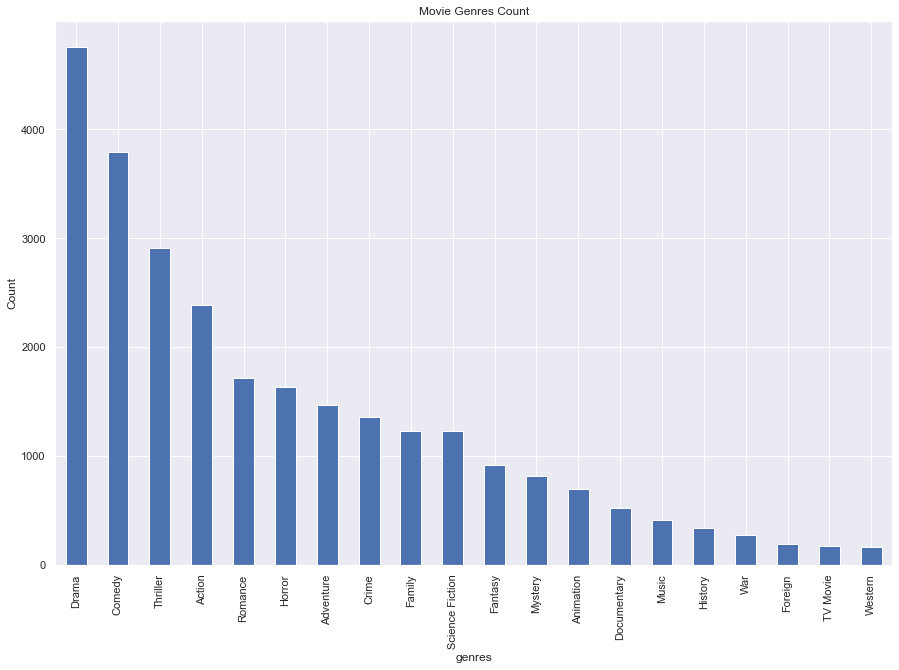

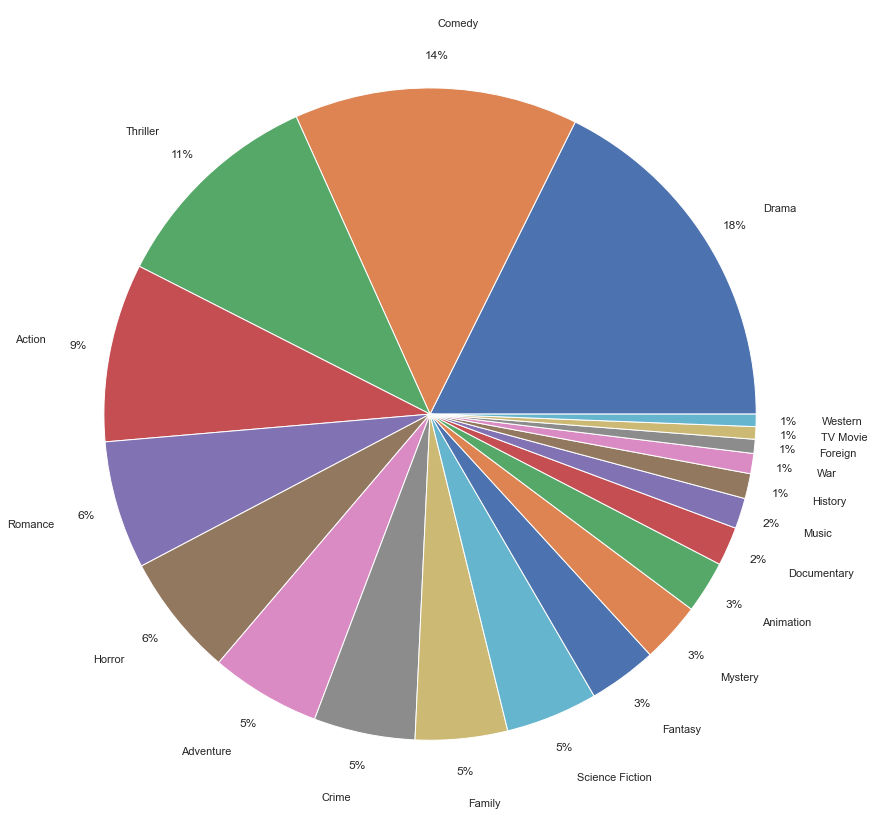

In [14]:
plotSingleValues('genres', 'Movie Genres Count')

# Q2: What are the most working production companies?

In [15]:
df.production_companies.value_counts()

Paramount Pictures                                                                                                        156
Universal Pictures                                                                                                        133
Warner Bros.                                                                                                               84
Walt Disney Pictures                                                                                                       76
Metro-Goldwyn-Mayer (MGM)                                                                                                  72
                                                                                                                         ... 
Screen Australia|Fulcrum Media Finance|ProdigyMovies                                                                        1
Revelations Entertainment|Lascaux Films|Latitude Productions                                                          

In [16]:
pd.Series(df.production_companies.str.cat(sep = '|').split('|')).value_counts()

Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
Columbia Pictures                         272
                                         ... 
Cold Fusion Media Group                     1
Little Gaddesden Productions                1
Milk & Media                                1
Visiona Romantica                           1
Charles Band Productions                    1
Length: 7879, dtype: int64

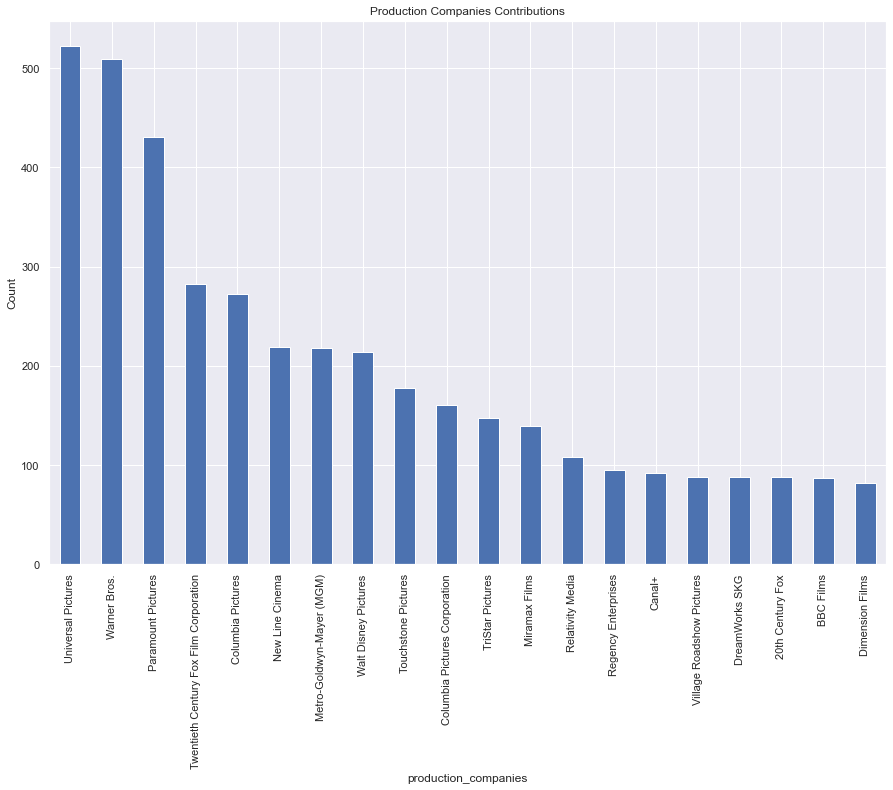

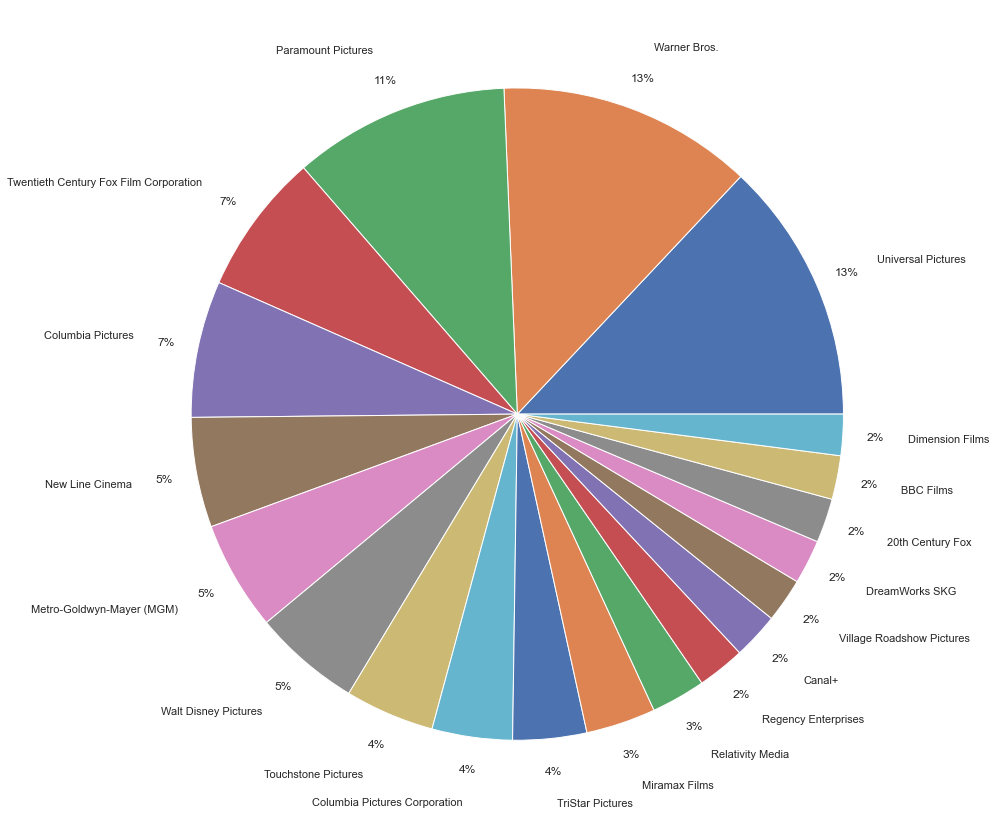

In [17]:
plotSingleValues('production_companies', 'Production Companies Contributions')

# Q3: Which actors contributed most in the movies?

In [18]:
df.cast.value_counts()

Louis C.K.                                                                          6
William Shatner|Leonard Nimoy|DeForest Kelley|James Doohan|George Takei             5
Bill Burr                                                                           4
George Carlin                                                                       3
Elijah Wood|Ian McKellen|Viggo Mortensen|Liv Tyler|Orlando Bloom                    3
                                                                                   ..
Andrew Swant|Pamela Bass|Jeffrey Jentzen|Pat Kennedy                                1
Antonio Banderas|Anthony Hopkins|Catherine Zeta-Jones|Stuart Wilson|Diego Sieres    1
Phoebe Cates|Betsy Russell|Matthew Modine|Michael Zorek|Fran Ryan                   1
Colin Farrell|Scott Caan|Ali Larter|Gabriel Macht|Gregory Smith                     1
Topher Grace|Anna Faris|Dan Fogler|Teresa Palmer|Michelle Trachtenberg              1
Name: cast, Length: 10719, dtype: int64

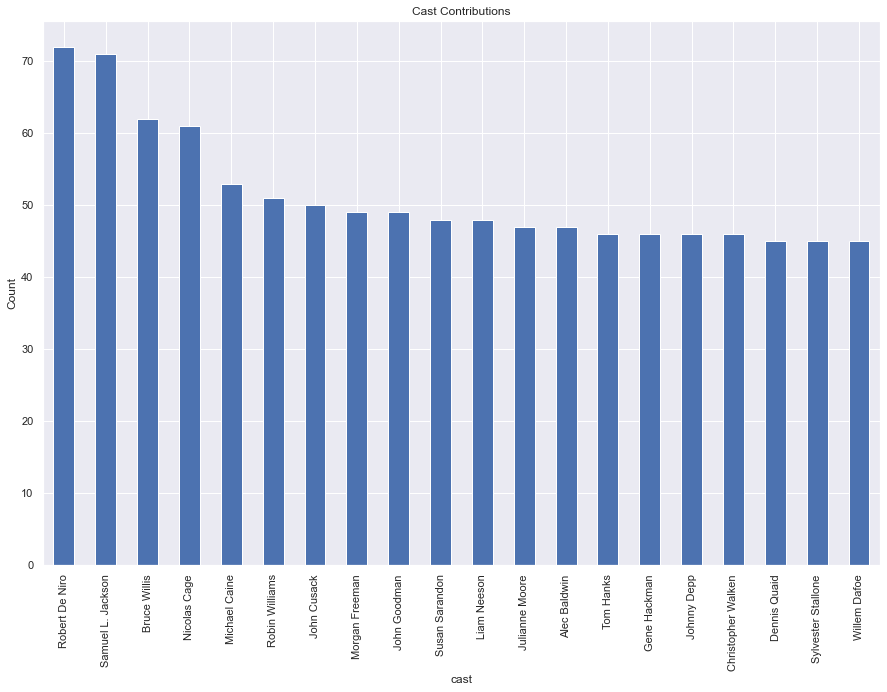

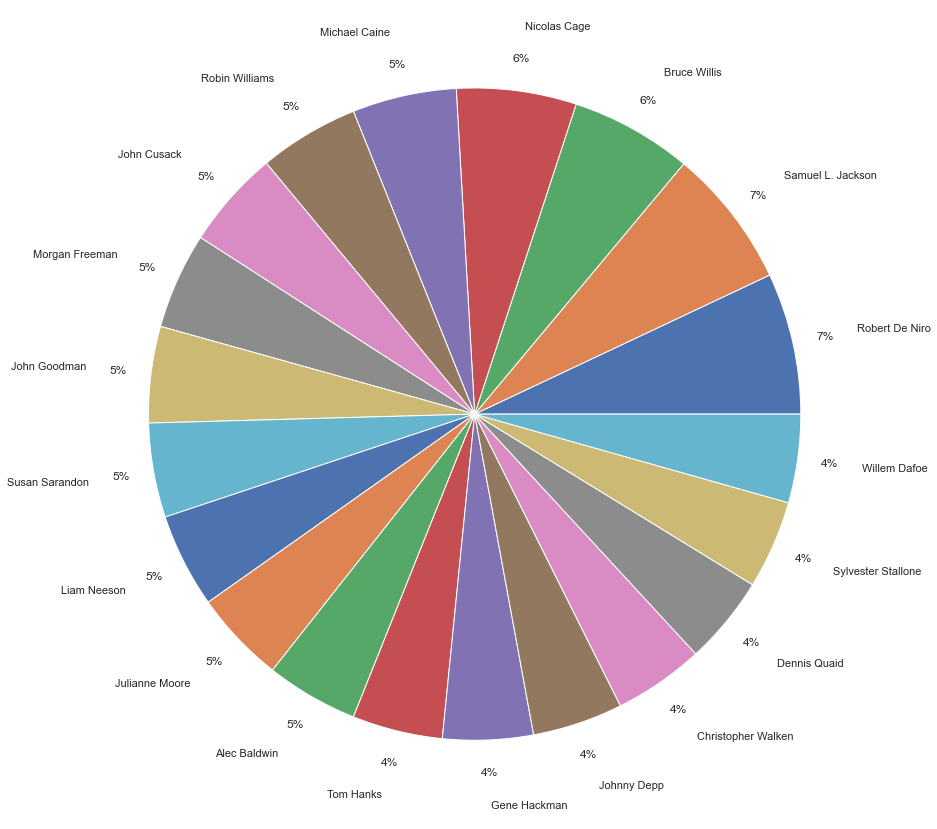

In [19]:
plotSingleValues('cast', 'Cast Contributions')

# Q4: Who Directed the most ?

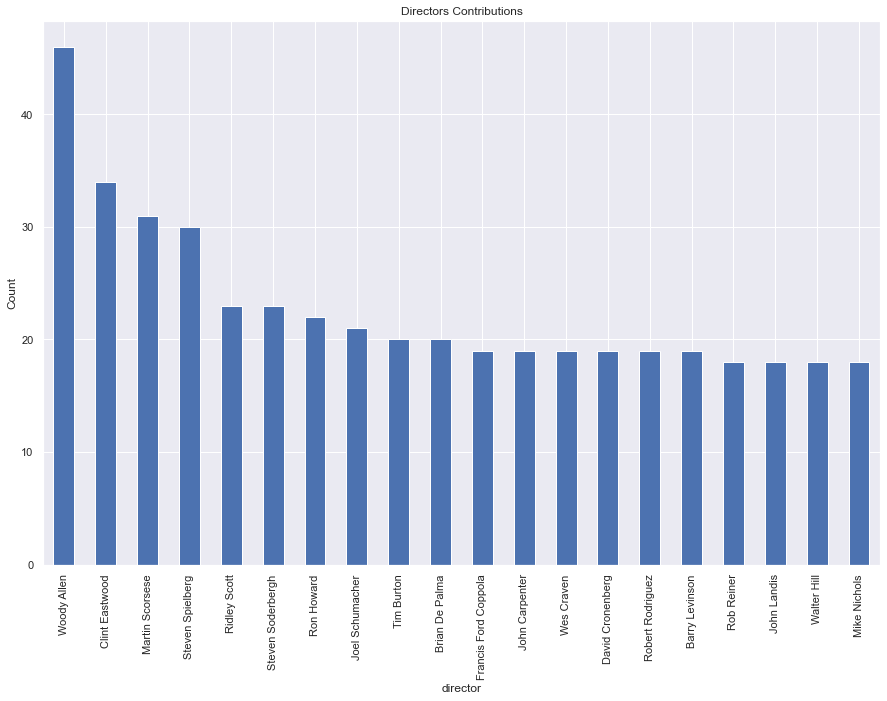

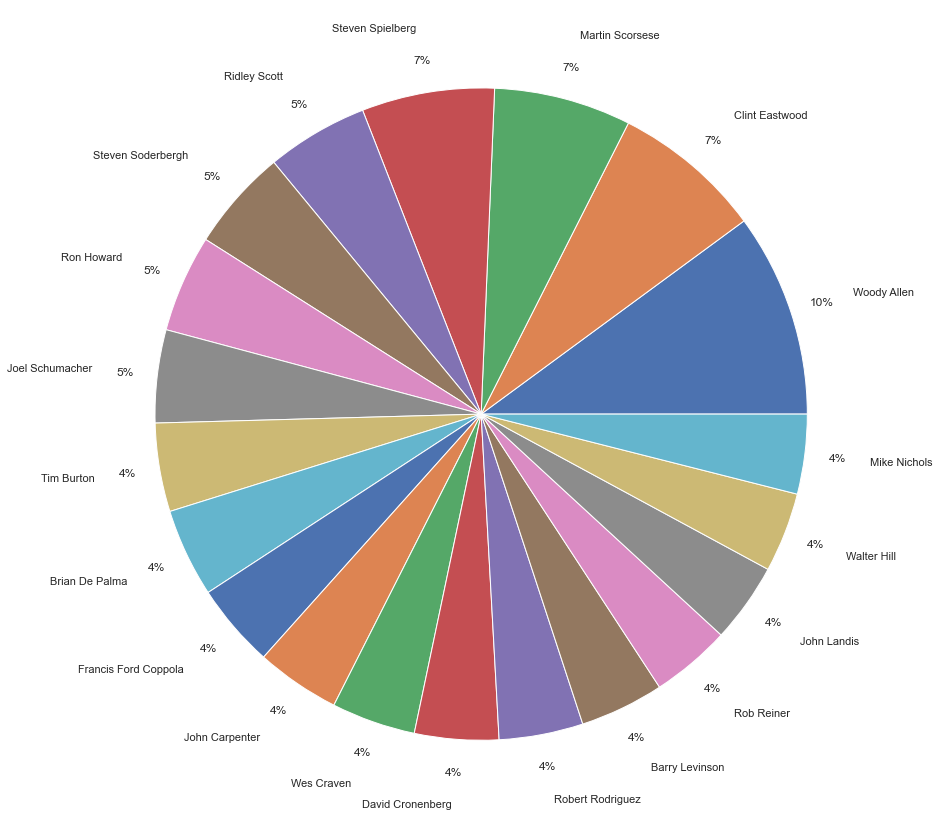

In [20]:
plotSingleValues('director', 'Directors Contributions')

# Q5: How data columns are correlated to each other?

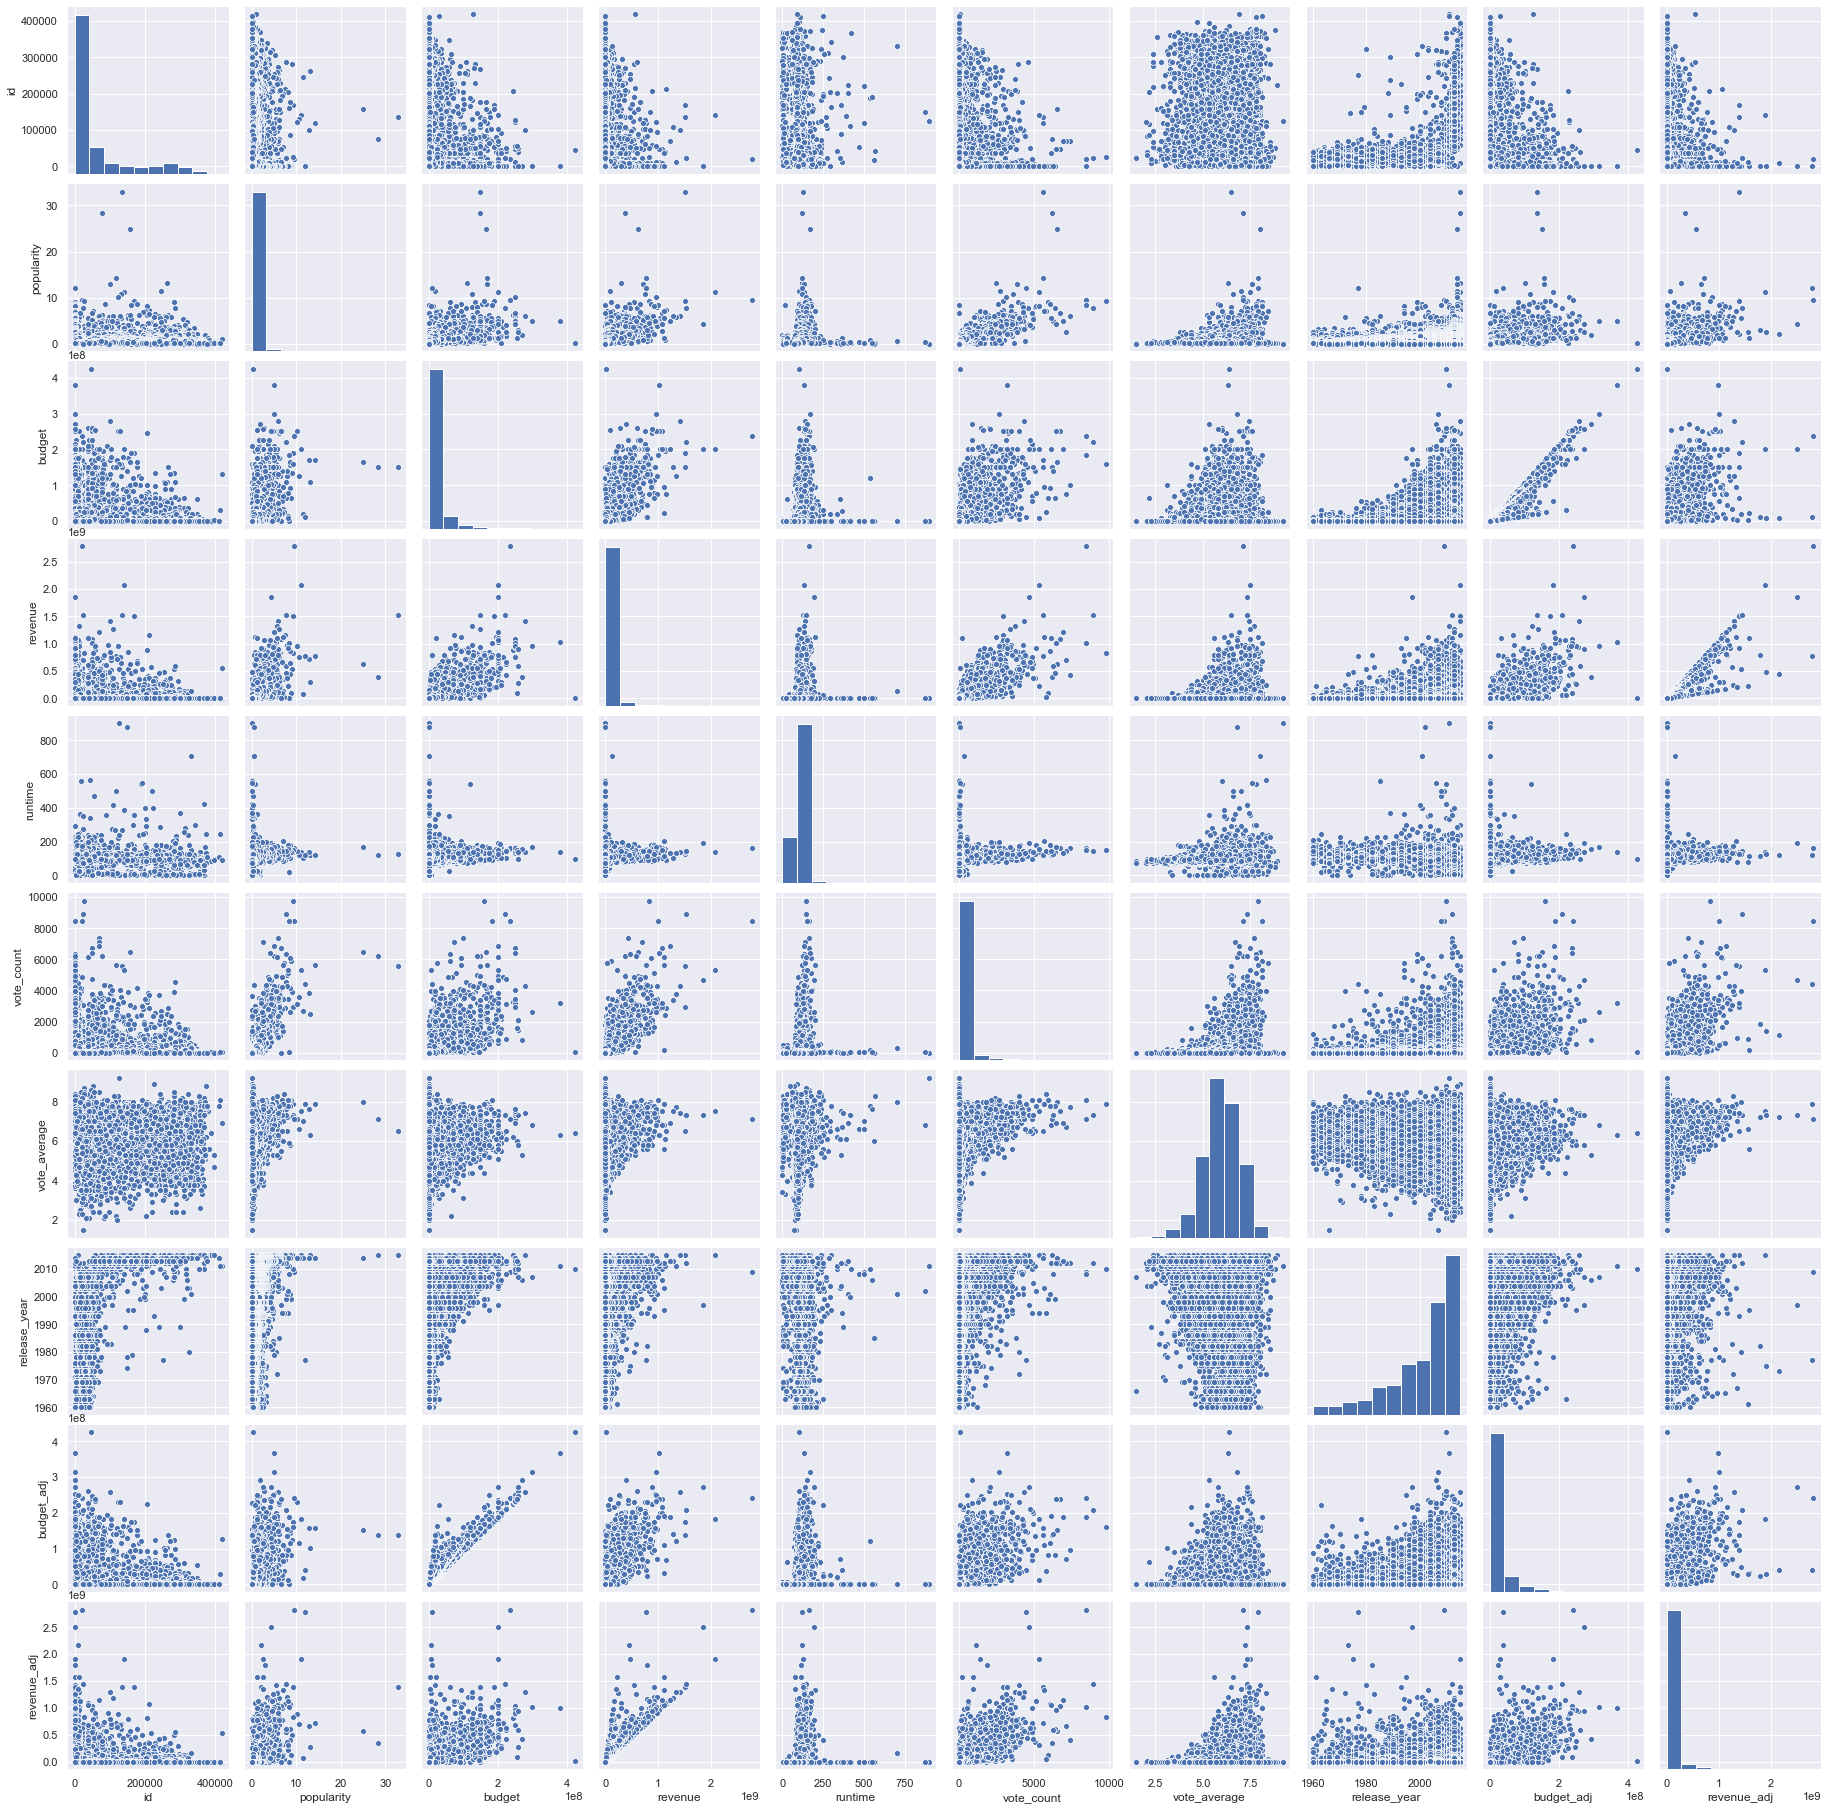

In [21]:
sns.pairplot(df, kind="scatter");
plt.show();

In [22]:
df.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.014351,-0.141341,-0.099235,-0.088368,-0.035555,-0.058391,0.511393,-0.189008,-0.138487
popularity,-0.014351,1.000000,0.545481,0.663360,0.139032,0.800828,0.209517,0.089806,0.513555,0.609085
budget,-0.141341,0.545481,1.000000,0.734928,0.191300,0.632719,0.081067,0.115904,0.968963,0.622531
revenue,-0.099235,0.663360,0.734928,1.000000,0.162830,0.791174,0.172541,0.057070,0.706446,0.919109
runtime,-0.088368,0.139032,0.191300,0.162830,1.000000,0.163273,0.156813,-0.117187,0.221127,0.175668
vote_count,-0.035555,0.800828,0.632719,0.791174,0.163273,1.000000,0.253818,0.107962,0.587062,0.707941
vote_average,-0.058391,0.209517,0.081067,0.172541,0.156813,0.253818,1.000000,-0.117576,0.093079,0.193062
release_year,0.511393,0.089806,0.115904,0.057070,-0.117187,0.107962,-0.117576,1.000000,0.016771,-0.066236
budget_adj,-0.189008,0.513555,0.968963,0.706446,0.221127,0.587062,0.093079,0.016771,1.000000,0.646627
revenue_adj,-0.138487,0.609085,0.622531,0.919109,0.175668,0.707941,0.193062,-0.066236,0.646627,1.000000


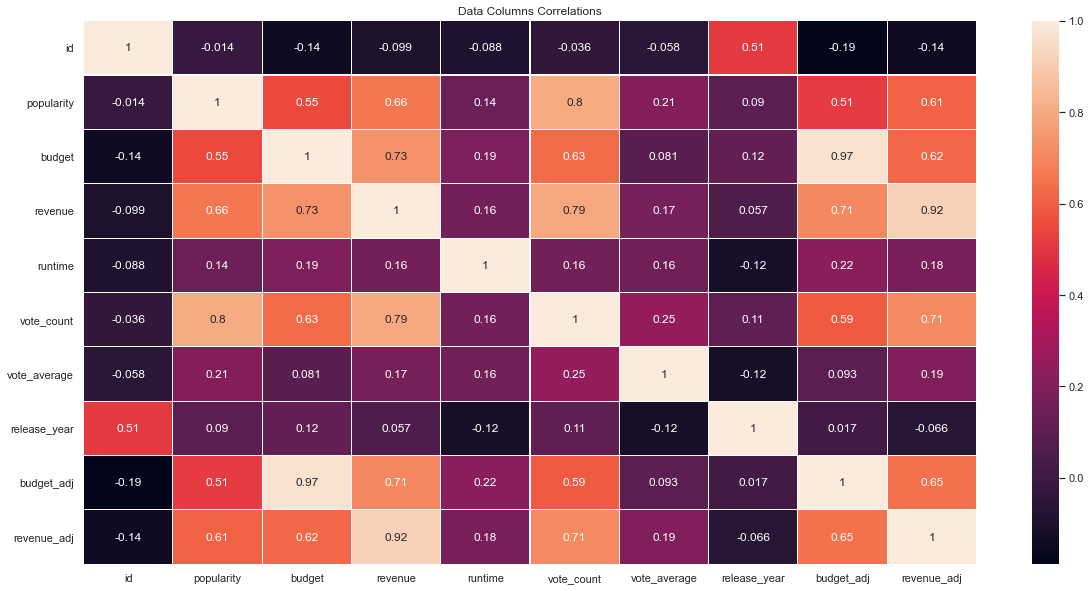

In [23]:
fig, ax = plt.subplots(figsize=(20, 10));
sns.heatmap(df.corr(), annot=True, linewidths=0.1);
plt.title('Data Columns Correlations');

# One-to-One Relations

# release_year VS budget

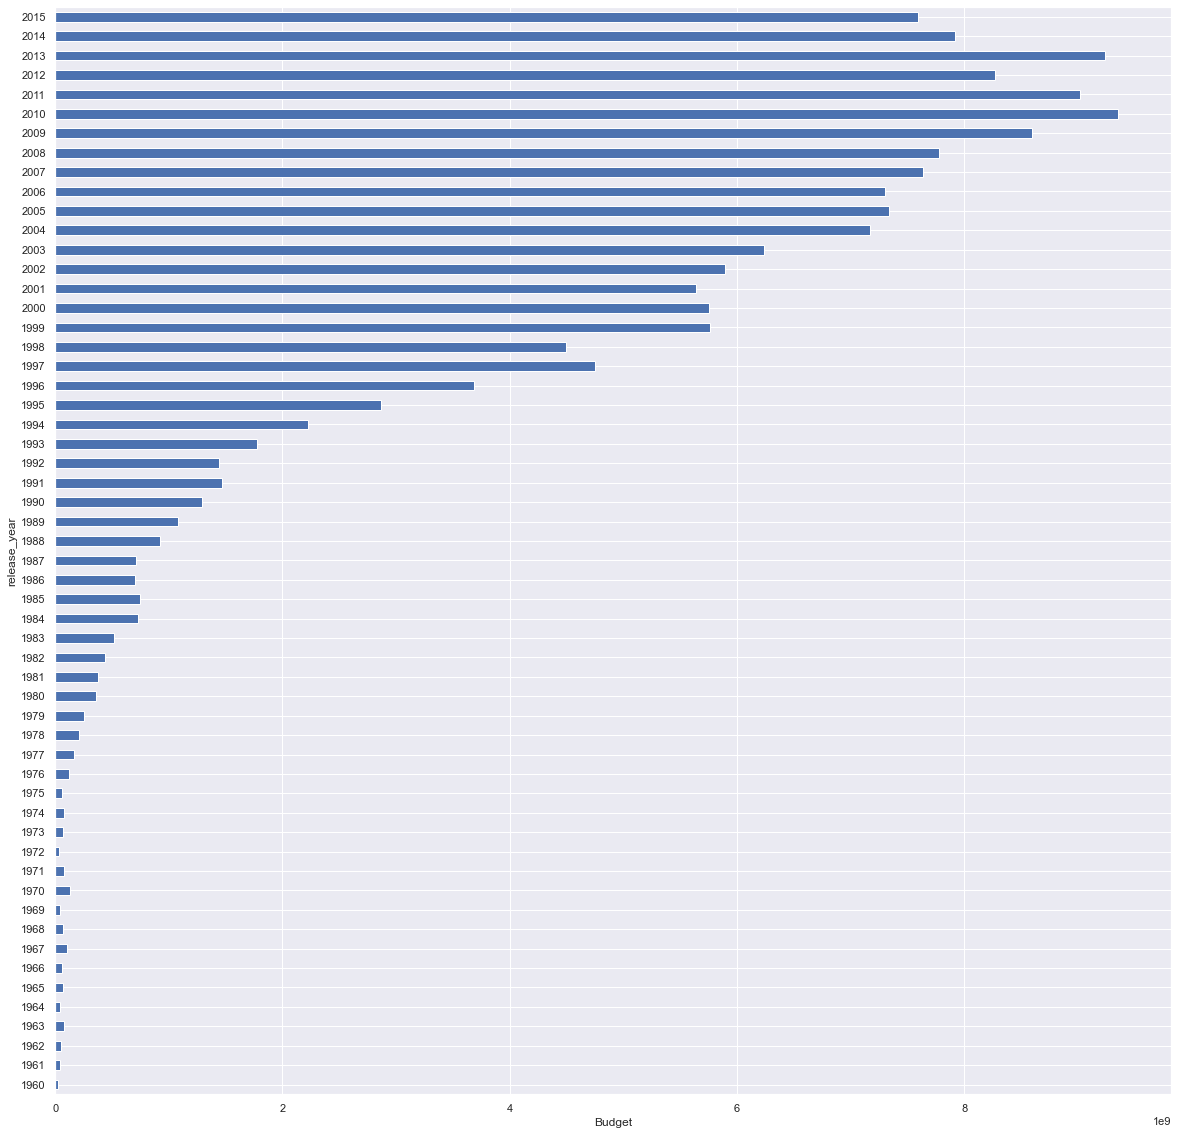

In [24]:
fig, ax = plt.subplots(figsize=(20, 20));
df.groupby('release_year')['budget'].sum().plot(kind='barh');
plt.xlabel('Budget');

# release_year VS revenue

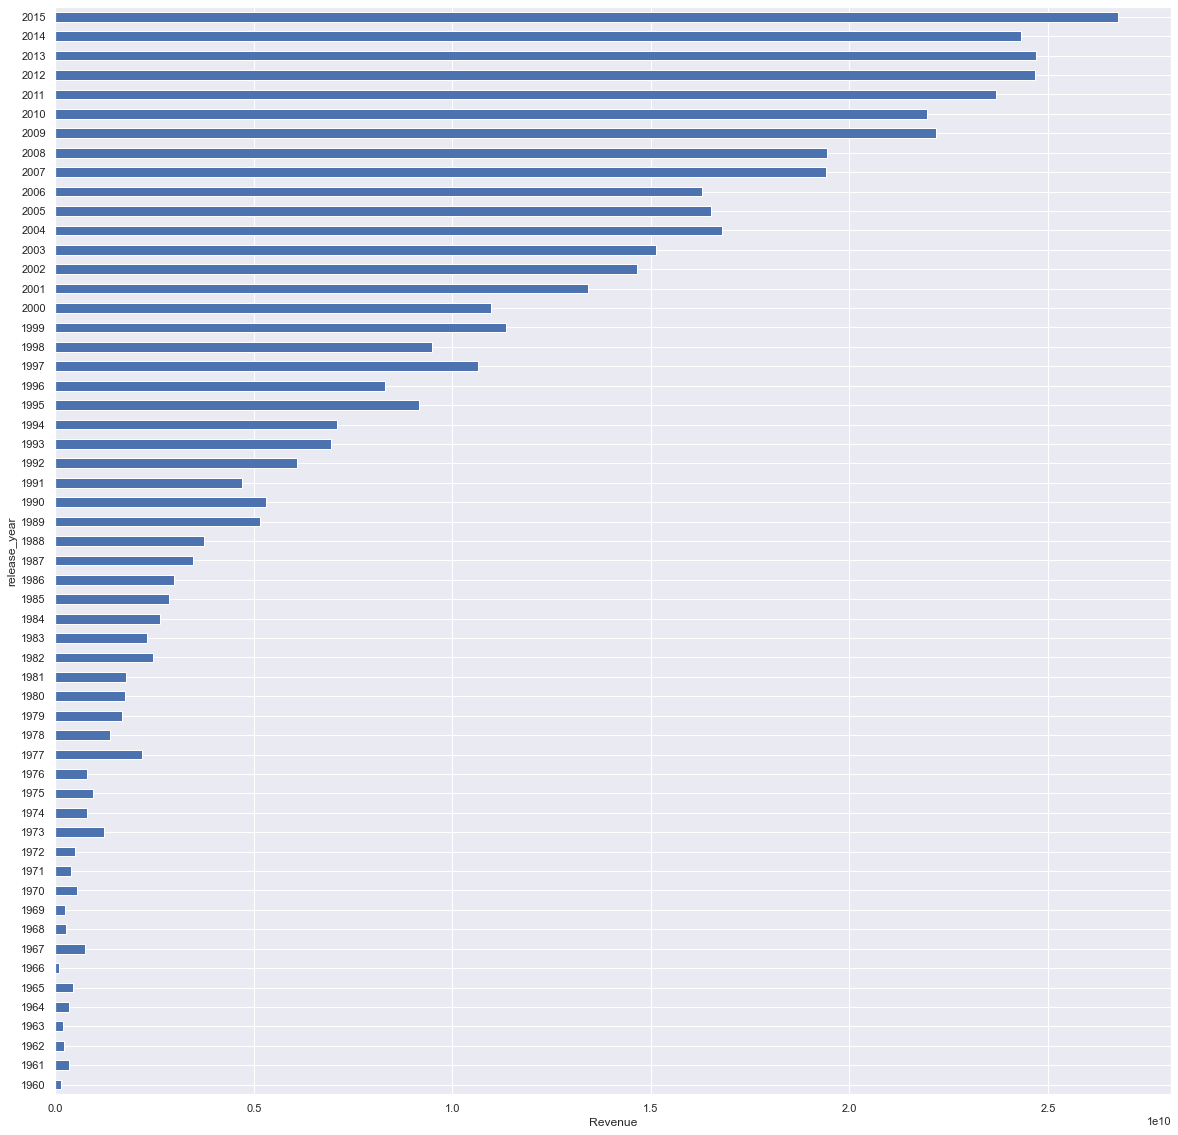

In [25]:
fig, ax = plt.subplots(figsize=(20, 20));
df.groupby('release_year')['revenue'].sum().plot(kind='barh');
plt.xlabel('Revenue');

## budget VS popularity and revenue

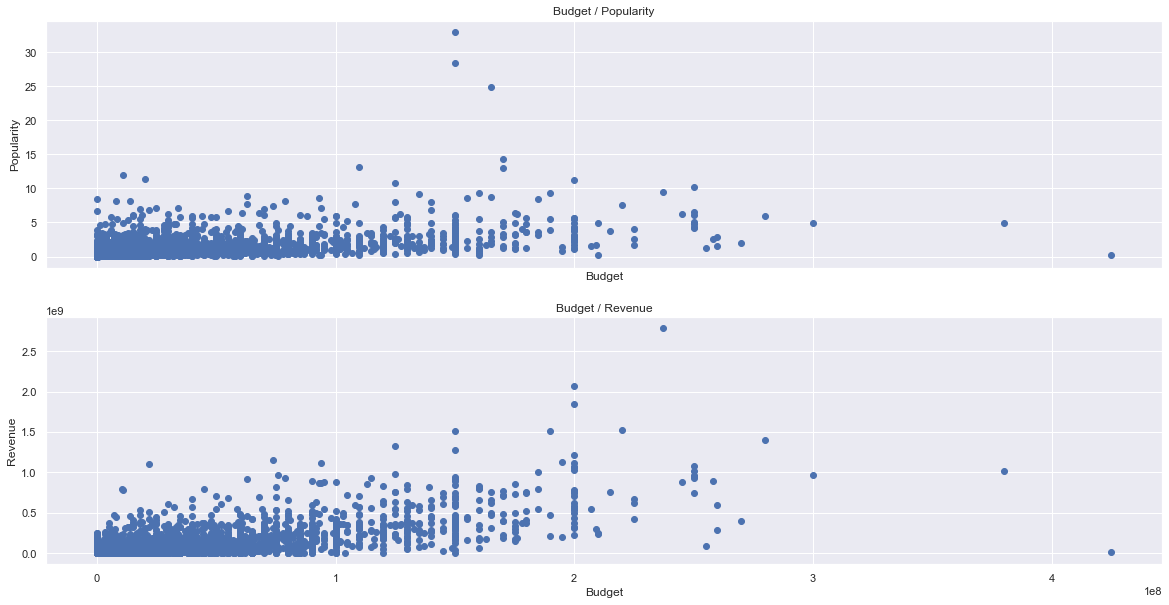

In [26]:
fig, axs = plt.subplots(2, sharex=True, figsize=(20, 10));
axs[0].scatter(df.budget, df.popularity);
axs[0].set_title('Budget / Popularity');
axs[0].set_xlabel('Budget');
axs[0].set_ylabel('Popularity');

axs[1].scatter(df.budget, df.revenue);
axs[1].set_title('Budget / Revenue');
axs[1].set_xlabel('Budget');
axs[1].set_ylabel('Revenue');

From the 2 plots it looks like that there is a linear relation between budget and popularuty <br>
also, the same for budget vs revenue there is a linear relation between then 

## runtime and popularity VS revenue

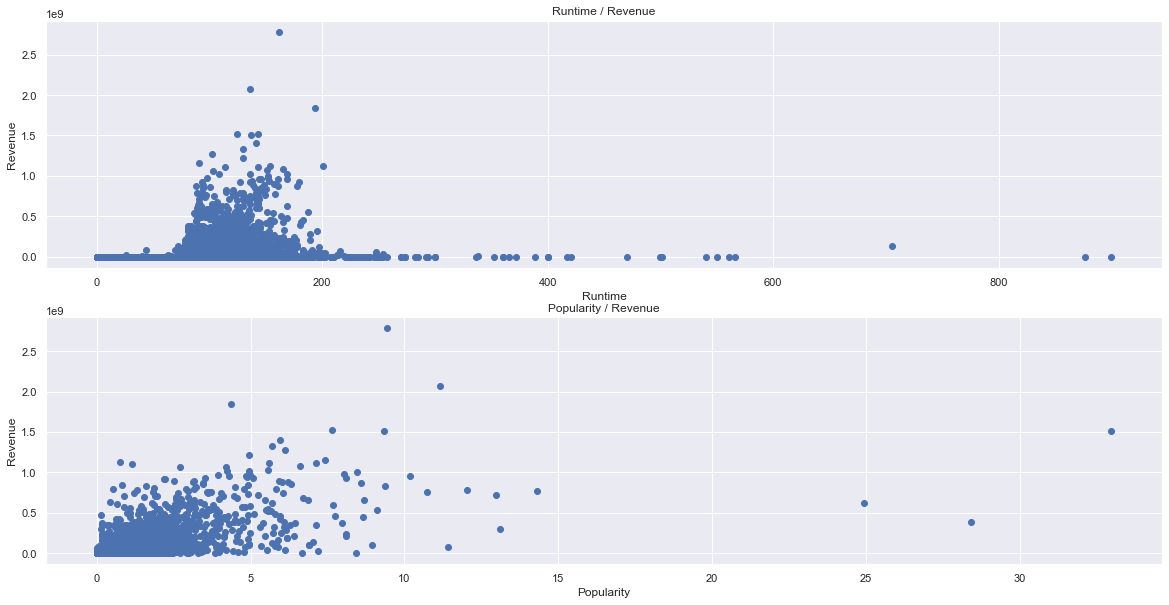

In [27]:
fig, axs = plt.subplots(2, figsize=(20, 10));
axs[0].scatter(df.runtime, df.revenue);
axs[0].set_title('Runtime / Revenue');
axs[0].set_xlabel('Runtime');
axs[0].set_ylabel('Revenue');

axs[1].scatter(df.popularity, df.revenue);
axs[1].set_title('Popularity / Revenue');
axs[1].set_xlabel('Popularity');
axs[1].set_ylabel('Revenue');

From the 1st plot, the runtime averages about 100 min. and further from this average revenues are low<br>
also, from the 2nd one it's linear relation between popularity and revenue

In [28]:
dfNonZero = df.loc[(df != 0).all(axis=1)]

In [29]:
def minMax(col):
    MAX = dfNonZero.loc[dfNonZero[col].idxmax()]
    MIN = dfNonZero.loc[dfNonZero[col].idxmin()]

    return (pd.concat([MAX, MIN], axis=1))

# Q6: What movie has the highest and the lowest budget?

In [30]:
minMax('budget')

,2244,2618
id,46528,39964
popularity,0.25054,0.090186
budget,425000000,1
revenue,11087569,100
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
production_companies,Boram Entertainment Inc.,Alcon Entertainment|Dinamo Entertainment


# What movie has the highest and the lowest revenue?

In [31]:
minMax('revenue')

,1386,5067
id,19995,13537
popularity,9.43277,0.462609
budget,237000000,6000000
revenue,2781505847,2
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Lions Gate Films|Cruise/Wagner Productions|Bau...


# What movie has the highest and the lowest popularity?

In [32]:
minMax('popularity')

,0,7268
id,135397,1392
popularity,32.9858,0.001117
budget,150000000,350000
revenue,1513528810,3515061
original_title,Jurassic World,Born into Brothels
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Zana Briski|Avijit|Geeta Masi|Kochi|Mamuni
director,Colin Trevorrow,Zana Briski|Ross Kauffman
runtime,124,85
genres,Action|Adventure|Science Fiction|Thriller,Documentary
production_companies,Universal Studios|Amblin Entertainment|Legenda...,NaN


# What movie has the highest and the lowest runtime?

In [33]:
minMax('runtime')

,2107,5162
id,43434,24914
popularity,0.534192,0.208637
budget,18000000,10
revenue,871279,5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
production_companies,Egoli Tossell Film AG|Canal+|Arte France|Films...,Studio 4Â°C


# What movie has the highest and the lowest vote_average?

In [34]:
minMax('vote_average')

,4178,4859
id,278,116977
popularity,7.19204,0.111351
budget,25000000,65000000
revenue,28341469,73706
original_title,The Shawshank Redemption,Foodfight!
cast,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Charlie Sheen|Wayne Brady|Hilary Duff|Eva Long...
director,Frank Darabont,Lawrence Kasanoff
runtime,142,87
genres,Drama|Crime,Animation|Action|Comedy|Family
production_companies,Castle Rock Entertainment,Threshold Entertainment|Lions Gate Family Ente...


In [35]:
def getRevenue(col):
    table = df[[col, 'revenue_adj']].dropna()
    temp = table[col].str.split('|')
    data = table.reindex(table.index.repeat(temp.apply(len)))
    data[col] = np.hstack(temp)
    fig, ax = plt.subplots(figsize=(20, 10));
    data.groupby(col)['revenue_adj'].sum().sort_values(ascending=False).head(20).plot(kind='barh')
    plt.xlabel('Revenue');

## New Q1: Which actors made the highest revenue?

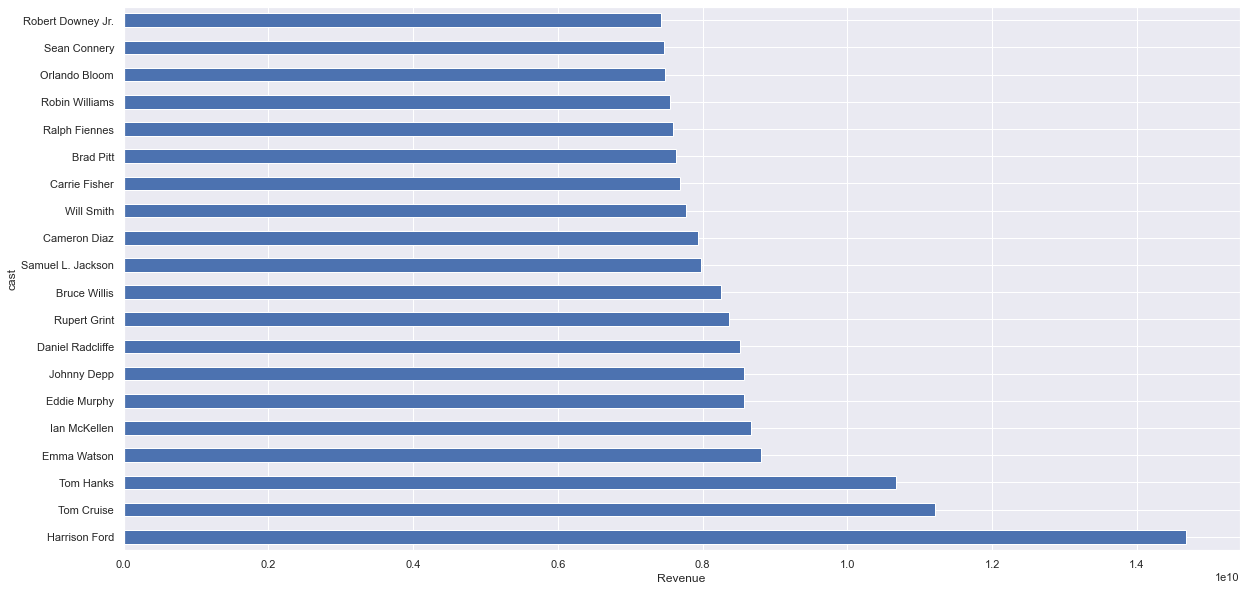

In [36]:
getRevenue('cast');

## New Q2: Which Production Companies made the highest revenue?

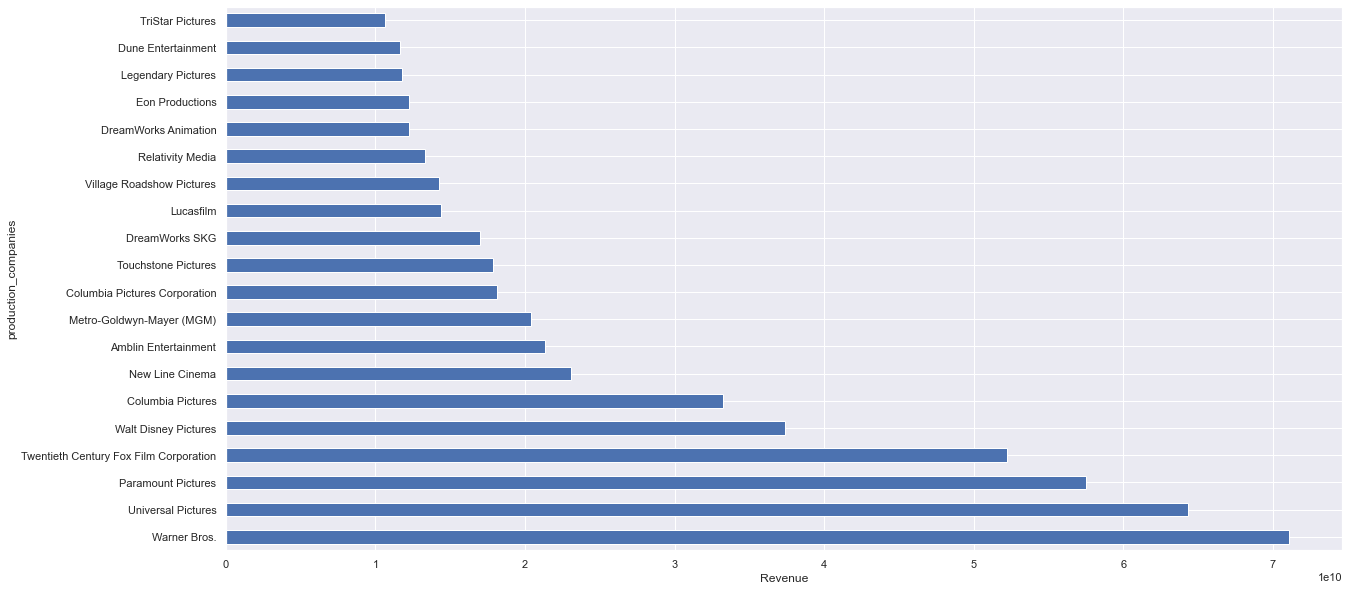

In [37]:
getRevenue('production_companies');

## New Q3: Which Genres made the highest revenue?

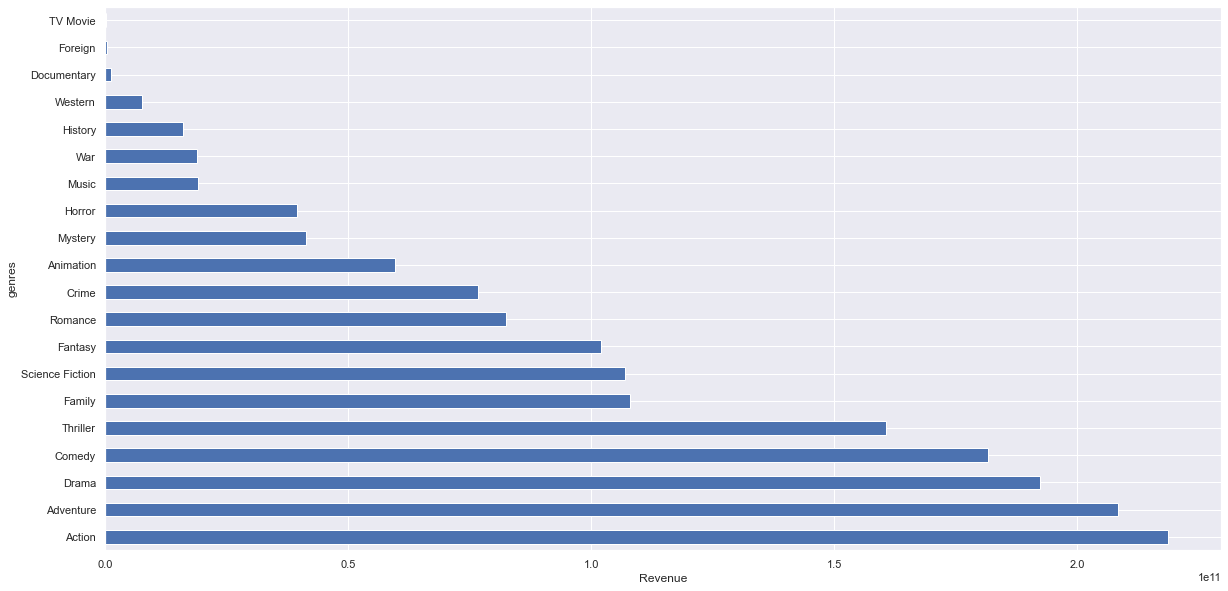

In [38]:
getRevenue('genres')

## New Q4: Which Director made the highest revenue?

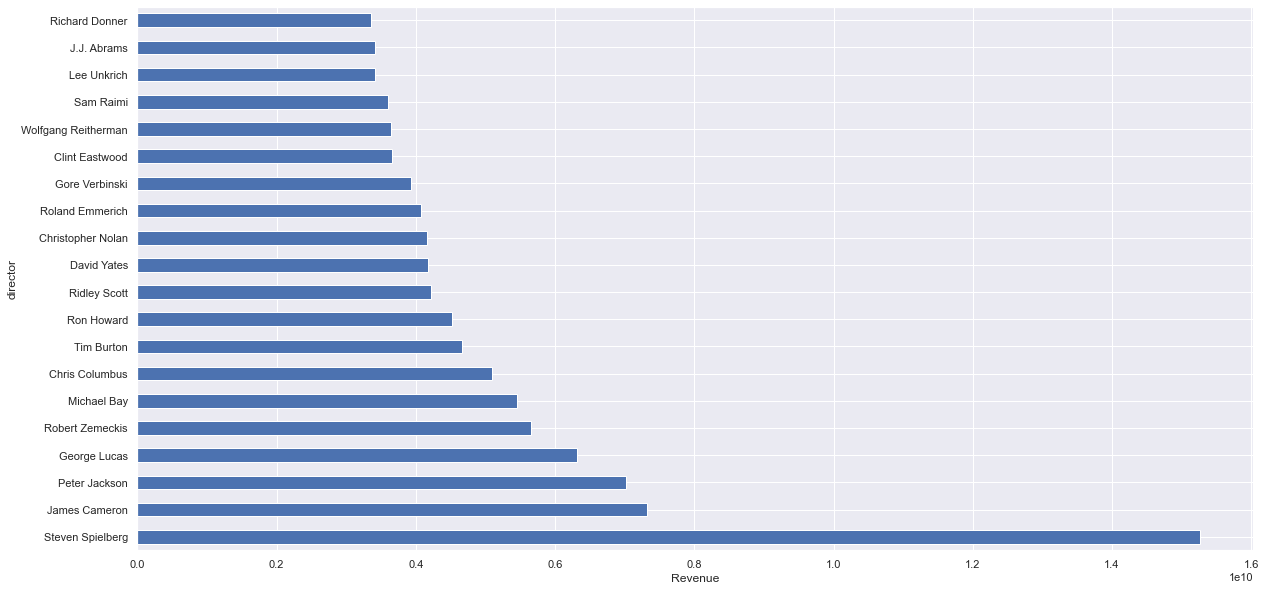

In [39]:
getRevenue('director')

## Conclusion:
* Most produced Genres in order are Drama, Comedy, Thriller, Action and Romance.
* Most Movies are produced by Universal Picture and Warnner Bros. which contribute by about 13% of top 20 companies productions each.
* Robert De Niro and Samuel L. Jakson are the most actors contributed in movies.
* Of course Woody Allen has the largest amount of movies as director.
* 2010 is the year with the highest movies budget.
* 2015 is the one with the highest revenues.
* The Warrior's Way Movie is the one which had the highest budget with [425000000].
* Avatar is the one with the highest revenue reaching [2781505847].
* Jurassic World has the most popularity and Born into Brothels has the lowest.
* Carlos has the longest [338 min] runtime ! and Kid's Story has the shortest [15 min].
<br><br>

### Regarding Revenues:
* Harrison Ford is the highest sctor.
* Warner Bros. is the highest company.
* Action is the highest Genre.
* Steven Spielberg is the highest Director.
<br><br>

### Some Observations:
* Budgets average around 14.6 M.
* Revenues average around 40 M.
* Runtime averages aroung 102 min.

## Limitations:
* Not all real data aren't taken into consediration because of missing or dropped data.
* Currency of the budget and revenue is unknown which makes Conclusion not accurate.
* Dataset is a bet outdated.

In [40]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'code.ipynb']);
print ('Done Converting to html')

Done Converting to html
